In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Load the data
data = pd.read_csv("Flight_Test_4-29.txt")

temp_C = data.iloc[:,25]

mx =  data.iloc[:,21]
my =  data.iloc[:,22]
mz =  data.iloc[:,23]


tt_pwm_index  = temp_C[temp_C == 21].index.tolist()[0]

mx -= mx[tt_pwm_index]
my -= my[tt_pwm_index]
mz -= mz[tt_pwm_index]


start = 0
end = len(data)

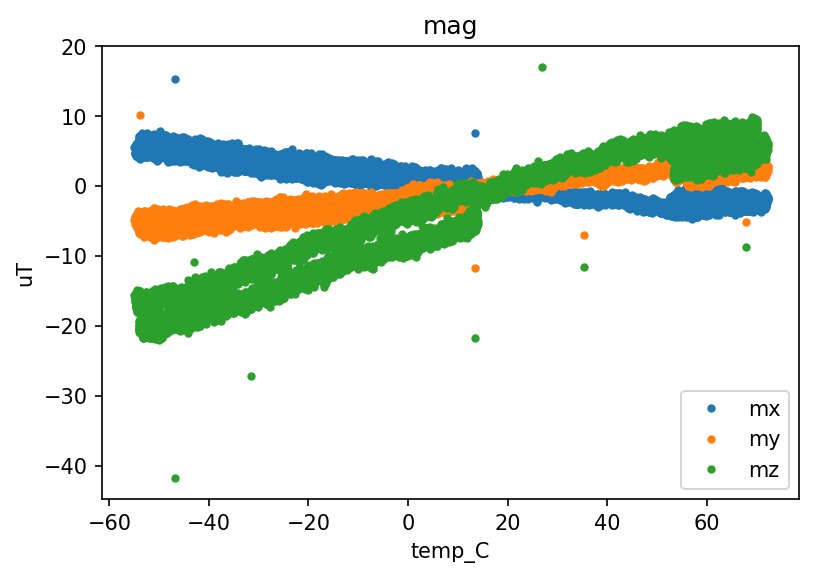

In [23]:
plt.figure(dpi=150)
plt.plot(temp_C[start:end], mx[start:end], '.',label = "mx")
plt.plot(temp_C[start:end], my[start:end],'.', label = "my")
plt.plot(temp_C[start:end], mz[start:end], '.',label = "mz")
plt.xlabel("temp_C")
plt.ylabel("uT")
plt.title("mag")
plt.legend()
plt.show()

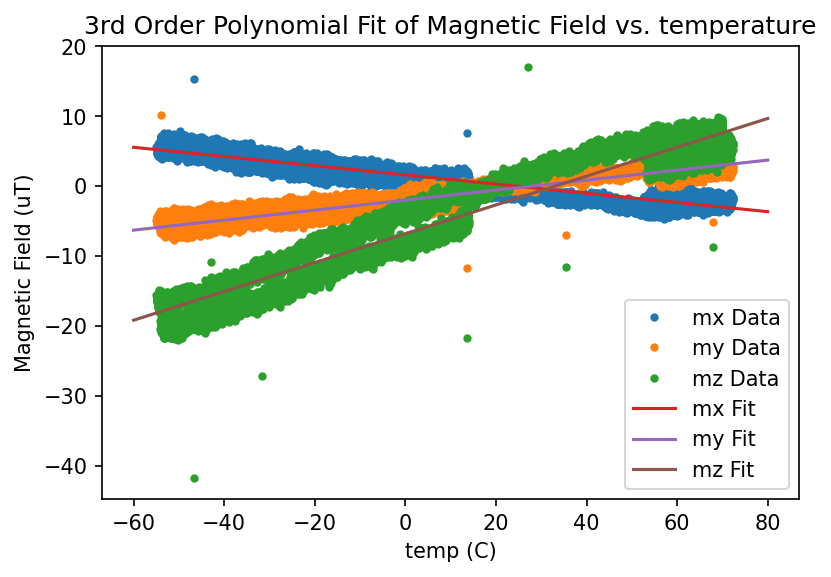

temp to Magx: [-0.06579313  1.58778742]
temp to Magy: [ 0.07157563 -2.0228565 ]
temp to Magz: [ 0.20615884 -6.83512131]


In [24]:

coeffs_mx = np.polyfit(temp_C[start:end], mx[start:end], 1)
coeffs_my = np.polyfit(temp_C[start:end], my[start:end], 1)
coeffs_mz = np.polyfit(temp_C[start:end], mz[start:end], 1)

# Create polynomial functions from the coefficients
poly_mx = np.poly1d(coeffs_mx)
poly_my = np.poly1d(coeffs_my)
poly_mz = np.poly1d(coeffs_mz)
# Generate a range of PWM values for plotting the fit
temp_fit = np.linspace(-60, 80, 500)

# Plot the original data
plt.figure(dpi=150)
plt.plot(temp_C[start:end], mx[start:end], '.', label="mx Data")
plt.plot(temp_C[start:end], my[start:end], '.', label="my Data")
plt.plot(temp_C[start:end], mz[start:end], '.', label="mz Data")

# Plot the fitted curves
plt.plot(temp_fit, poly_mx(temp_fit), label="mx Fit")
plt.plot(temp_fit, poly_my(temp_fit), label="my Fit")
plt.plot(temp_fit, poly_mz(temp_fit), label="mz Fit")
plt.xlabel("temp (C)")
plt.ylabel("Magnetic Field (uT)")
plt.title("3rd Order Polynomial Fit of Magnetic Field vs. temperature")


plt.legend()
plt.show()

print("temp to Magx: "+ str(coeffs_mx))
print("temp to Magy: "+ str(coeffs_my))
print("temp to Magz: "+ str(coeffs_mz))